In [1]:
import numpy as np
from matplotlib import pyplot as plt
import colorsys

plt.rcParams['figure.figsize']=[16,9]

# tQ = 0.1 * 2 ** (k / 10)
# nu_exp = 0.67
# z_exp  = 1
# ksi = tQ ** 0.4
# ksi2Delta_sp = ksi ** (1 + 0.038176)

def file(D, k):
    return './BH-cubicramp_3_' + str(D) + '_' + str(float(k)) + '_0.1'

In [49]:
np.real_if_close(1+1j*1e-12, tol=8000)

array(1.)

./BH-cubicramp_3_4_10.0_0.1
(1, 12)
./BH-cubicramp_3_4_10.0_0.1
(1, 12)
./BH-cubicramp_3_4_10.0_0.1
./BH-cubicramp_3_4_10.0_0.1
./BH-cubicramp_3_6_10.0_0.1
(1, 12)
./BH-cubicramp_3_6_10.0_0.1
(1, 12)
./BH-cubicramp_3_6_10.0_0.1
./BH-cubicramp_3_6_10.0_0.1
./BH-cubicramp_3_8_10.0_0.1
(1, 12)
./BH-cubicramp_3_8_10.0_0.1
(1, 12)
./BH-cubicramp_3_8_10.0_0.1
./BH-cubicramp_3_8_10.0_0.1
./BH-cubicramp_3_10_10.0_0.1
(1, 12)
./BH-cubicramp_3_10_10.0_0.1
(1, 12)
./BH-cubicramp_3_10_10.0_0.1
./BH-cubicramp_3_10_10.0_0.1
./BH-cubicramp_3_12_10.0_0.1
(1, 12)
./BH-cubicramp_3_12_10.0_0.1
(1, 12)
./BH-cubicramp_3_12_10.0_0.1
./BH-cubicramp_3_12_10.0_0.1
./BH-cubicramp_3_14_10.0_0.1
(1, 12)
./BH-cubicramp_3_14_10.0_0.1
./BH-cubicramp_3_14_10.0_0.1
./BH-cubicramp_3_14_10.0_0.1
./BH-cubicramp_3_4_20.0_0.1
(1, 12)
./BH-cubicramp_3_4_20.0_0.1
(1, 12)
./BH-cubicramp_3_4_20.0_0.1
./BH-cubicramp_3_4_20.0_0.1
./BH-cubicramp_3_6_20.0_0.1
(1, 12)
./BH-cubicramp_3_6_20.0_0.1
(1, 12)
./BH-cubicramp_3_6_20.0_0.1


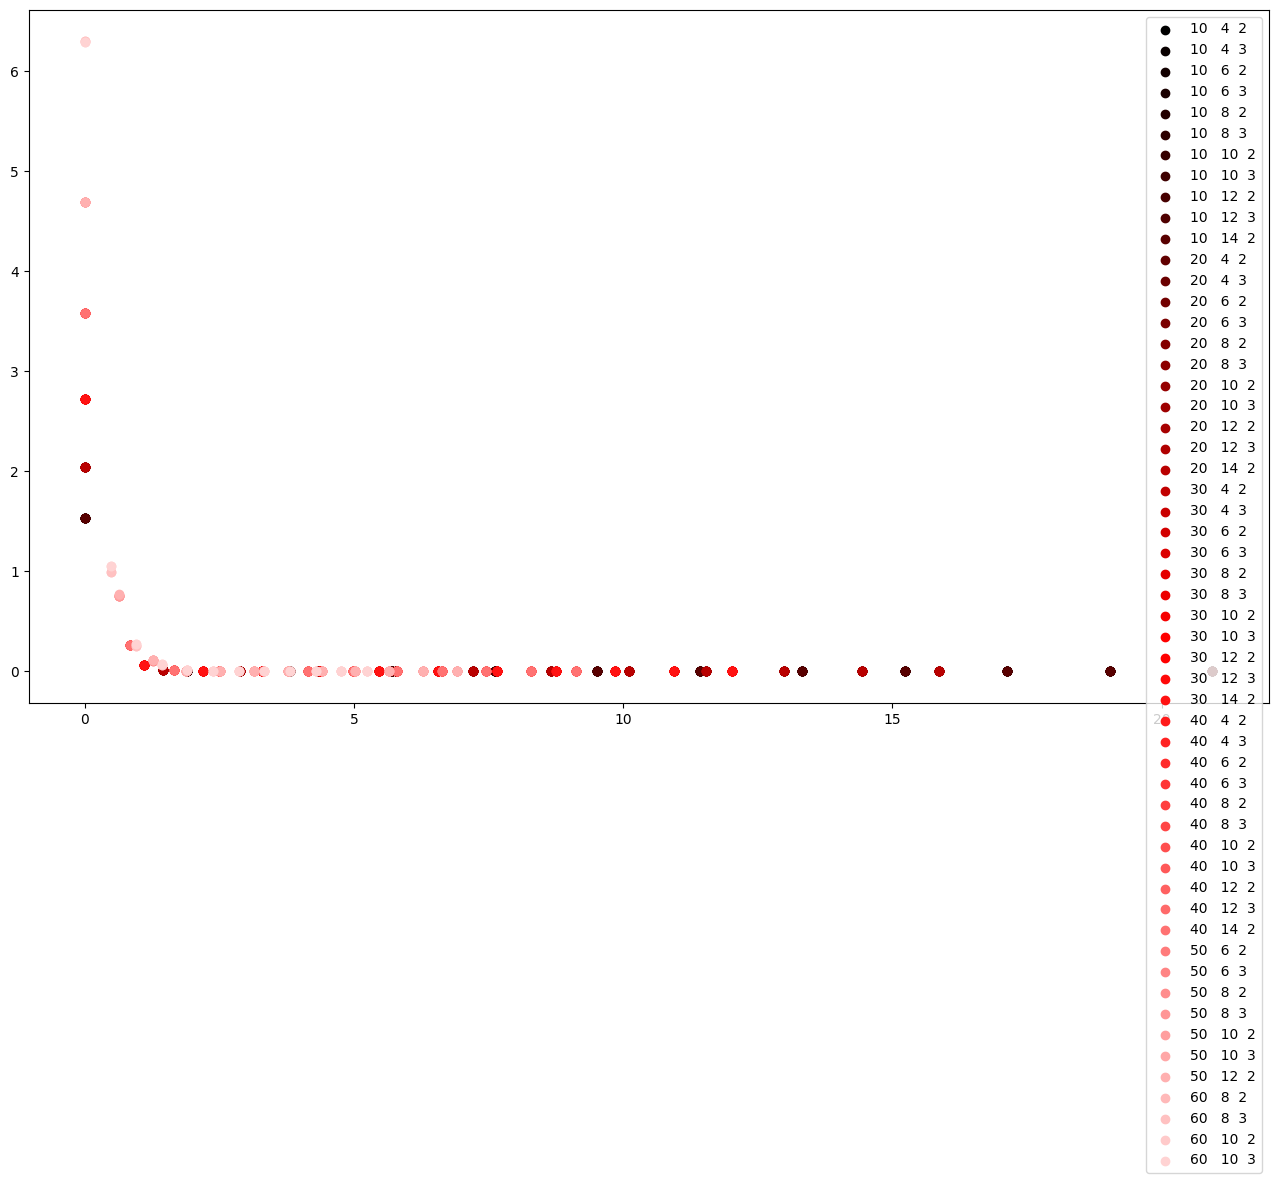

In [50]:
fig,ax=plt.subplots()

GrandIterator = 0
GrandData = []
colors = [(x,0,0) for x in np.linspace(0,1,30,endpoint=True)] + [(1,x,x) for x in np.linspace(0,1,30,endpoint=True)]
for k in [10,20,30,40,50,60,70,80,90,100]:
    tQ = 0.1 * 2 ** (k / 10)
    nu_exp = 0.67
    ksi = tQ ** 0.4
    ksi2Delta_sp = ksi ** (1 + 0.038176)
    ksi2Delta_dd = ksi ** (2 * (1 + 0.038176))
    i_around = int(3 / 2 * 2 ** (k / 10))
    inds = np.arange(i_around - 2, i_around + 3)
    for D in [4,6,8,10,12,14]:
        dirr = file(D, k)
        Delta = 0
        for i in np.arange(0, i_around + 1):
            try:
                PEPS = dict(np.load(dirr + f'/PEPS_{i:05d}.npz'))
                Delta += PEPS['NTUdelta']
            except: break

        for chimult in [2,3,4,5]:
            print(dirr)
            COR_AA, COR_NN = [], []
            for i in [i_around]:
                if i != i_around: continue
                try:
                    corr_aah_ns_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_AAH_NS_{i:05d}.npz'))['corA']
                    corr_aah_ns_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_AAH_NS_{i:05d}.npz'))['corB']
                    corr_aha_ns_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_AHA_NS_{i:05d}.npz'))['corA']
                    corr_aha_ns_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_AHA_NS_{i:05d}.npz'))['corB']
                    corr_aah_we_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_AAH_WE_{i:05d}.npz'))['corA']
                    corr_aah_we_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_AAH_WE_{i:05d}.npz'))['corB']
                    corr_aha_we_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_AHA_WE_{i:05d}.npz'))['corA']
                    corr_aha_we_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_AHA_WE_{i:05d}.npz'))['corB']

                    corr_nn_ns_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_NN_NS_{i:05d}.npz'))['corA']
                    corr_nn_ns_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_NN_NS_{i:05d}.npz'))['corB']
                    corr_nn_we_A = dict(np.load(dirr + f'/CORR_{chimult:01d}_NN_WE_{i:05d}.npz'))['corA']
                    corr_nn_we_B = dict(np.load(dirr + f'/CORR_{chimult:01d}_NN_WE_{i:05d}.npz'))['corB']
                except: continue
                cor_nn = np.array([corr_nn_ns_A,corr_nn_ns_B,corr_nn_we_A,corr_nn_we_B])
                cor_aa = np.array([corr_aha_we_B,corr_aha_we_A,corr_aah_we_B,corr_aah_we_A,corr_aha_ns_B,corr_aha_ns_A,corr_aah_ns_B,corr_aah_ns_A])
                # COR_AA.append(np.array([np.mean(cor_aa, axis=0),np.std(cor_aa, axis=0)]))
                COR_AA.append(2 * np.real_if_close(np.mean(cor_aa, axis=0), tol=8000))
                COR_NN.append(np.real_if_close(np.mean(cor_nn, axis=0), tol=8000))
            if len(COR_AA) == 0: continue
            COR_AA = np.array(COR_AA)
            COR_NN = np.array(COR_NN)
            print(COR_AA.shape)
            notscaledX = np.arange(0,COR_AA[0,:].shape[0])
            ax.scatter(notscaledX/ksi,ksi2Delta_sp*COR_AA[0,:], label = str(k)+"   "+str(D)+"  "+str(chimult), color=colors[GrandIterator])
            GrandIterator+=1
            GrandData.append({'COR_AA':COR_AA, 'COR_NN':COR_NN, 'notscaledX':notscaledX, 'D':D, 'k':k, 'chimult':chimult, 'scaledY_AA':ksi2Delta_sp*COR_AA[0,:], 'scaledY_NN':ksi2Delta_dd*COR_NN[0,:], 'scaledX':notscaledX/ksi, 'Delta': Delta, 'tQ': tQ, 'ksi':ksi, 'ksi2Delta_sp':ksi2Delta_sp, 'ksi2Delta_dd':ksi2Delta_dd})
ax.legend()
print(GrandData[0])

In [51]:
cs = [colorsys.hsv_to_rgb(x,1,1) for x in np.linspace(0,6/8,7,endpoint=True)]
colors = {}
try:
    for n,k in enumerate(np.arange(10,110,10)):
        colors[k] = cs[n]
except: pass

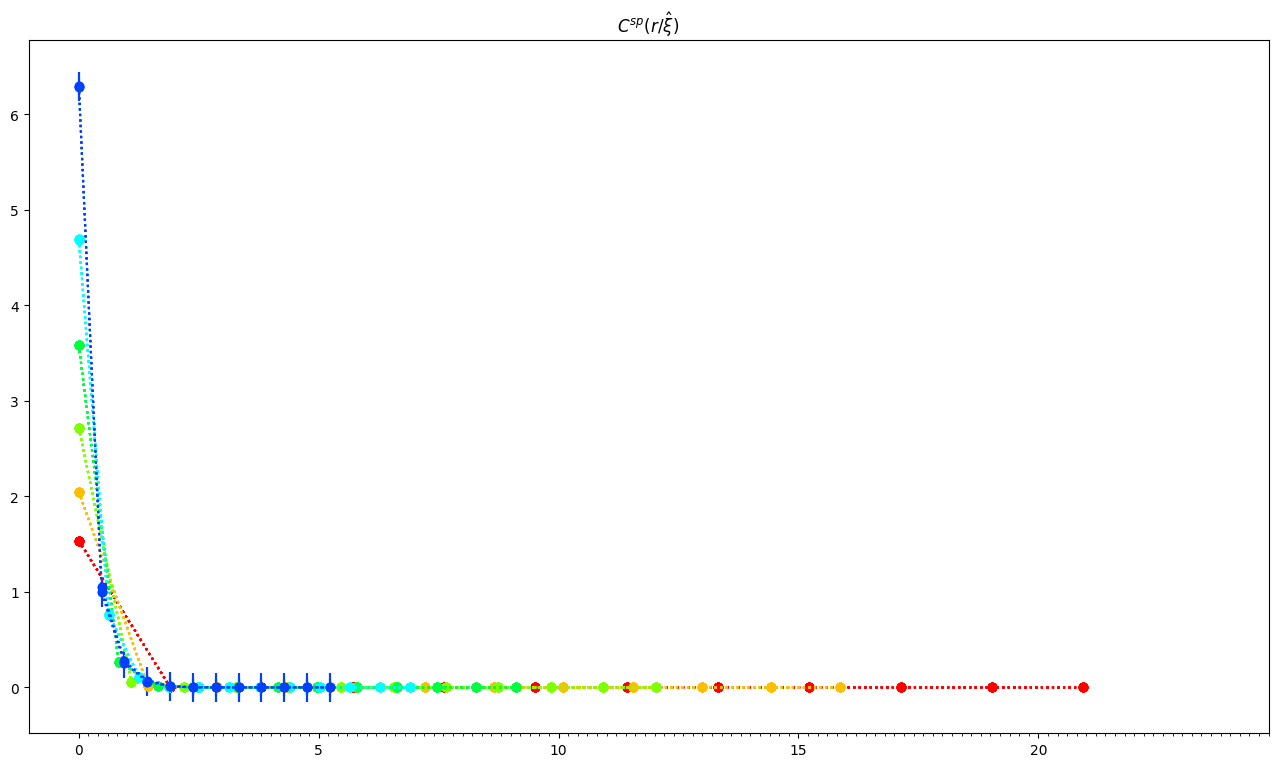

In [59]:
dataref = {}
form = []

fig,ax=plt.subplots()
ax.set_title("$C^{sp}(r/\\hat\\xi)$")
n = 0
for i,data in enumerate(GrandData):
    xs = data['scaledX']
    ys = data['scaledY_AA']
    ax.errorbar(xs, ys, [20*8*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])

ax.set_xticks(np.arange(0,25,0.2), minor=True)

# ax.set_xlim((0.4,4.5))
# ax.legend()

10
10
10
10
10
10
10
10
10
10
10
20
20
20
20
20
20
20
20
20
20
20
30
30
30
30
30
30
30
30
30
30
30
40
40
40
40
40
40
40
40
40
40
40
50
50
50
50
50
50
50
60
60
60
60


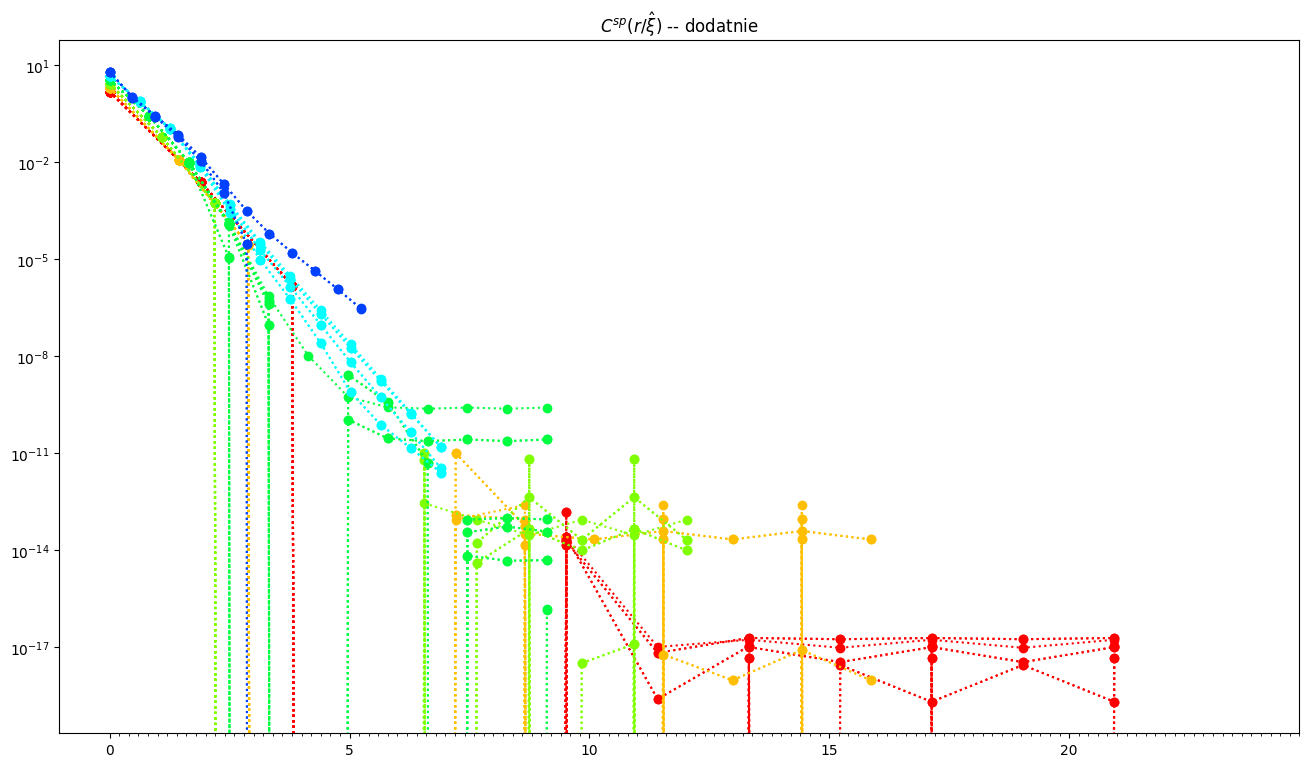

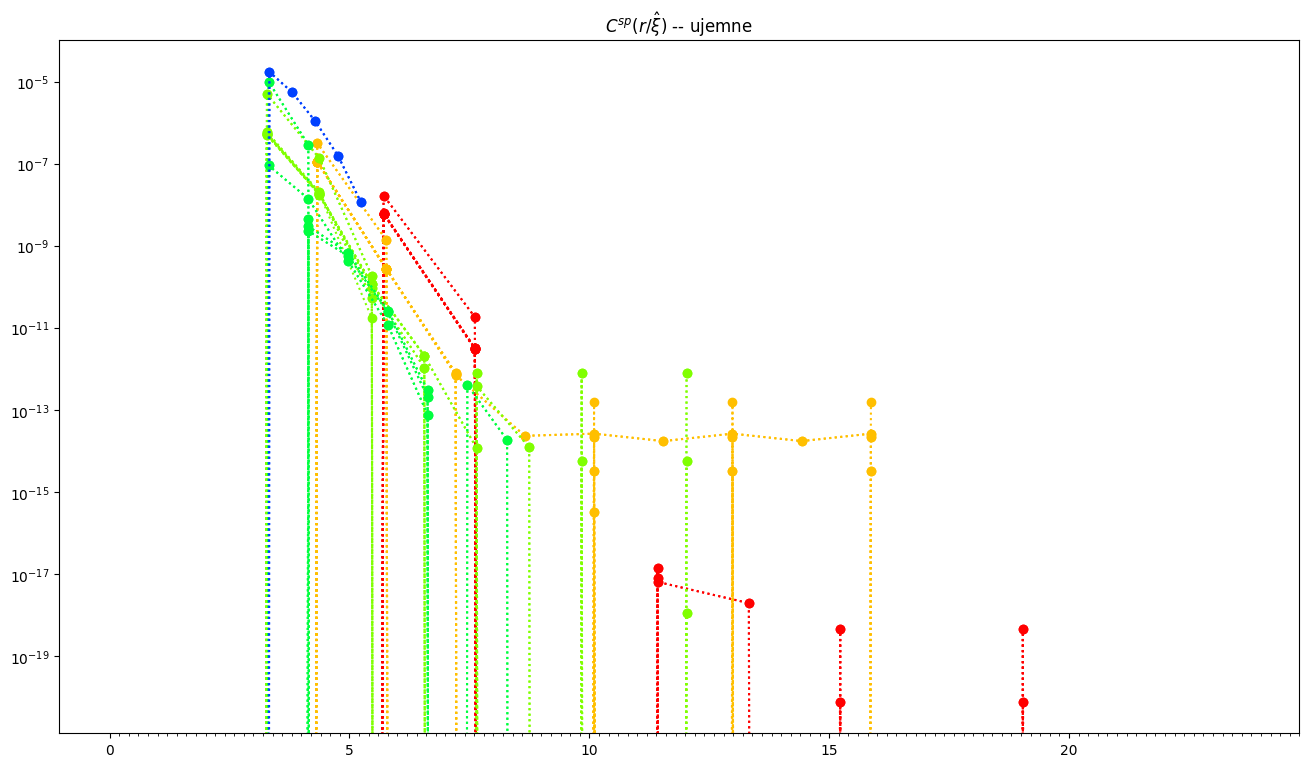

In [56]:
dataref = {}
form = []

fig,ax=plt.subplots()
fig2,ax2=plt.subplots()
n = 0
for i,data in enumerate(GrandData):
    print(data['k'])
    xs = data['scaledX']
    ys = data['scaledY_AA']
    ax.errorbar(xs, ys, [0*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])
    ax2.errorbar(xs, -ys, [0*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])
ax.set_yscale('log')
ax.set_xticks(np.arange(0,25,0.2), minor=True)
ax.set_title("$C^{sp}(r/\\hat\\xi)$ -- dodatnie")
ax2.set_title("$C^{sp}(r/\\hat\\xi)$ -- ujemne")
ax2.set_yscale('log')
ax2.set_xticks(np.arange(0,25,0.2), minor=True)
# ax.set_xlim((0.4,4.5))
# ax.legend()

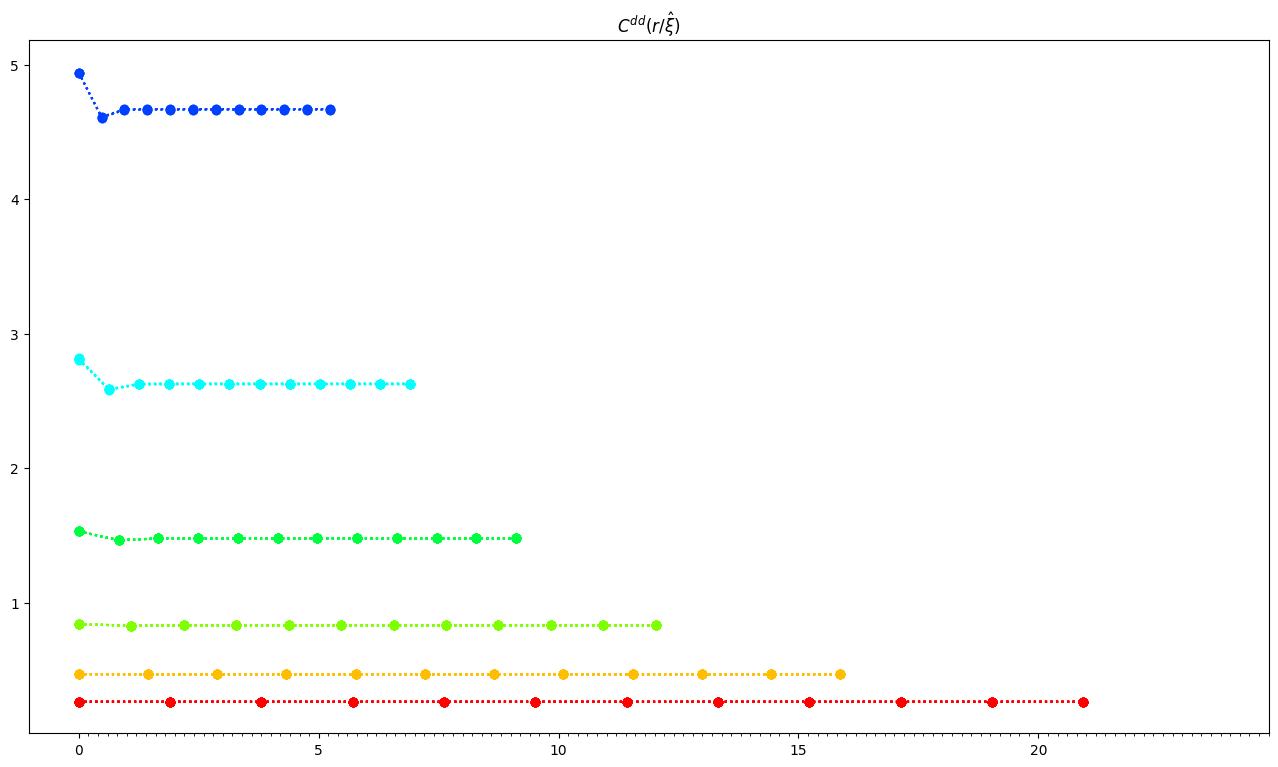

In [54]:
dataref = {}
form = []

fig,ax=plt.subplots()
ax.set_title("$C^{dd}(r/\\hat\\xi)$")
n = 0
for i,data in enumerate(GrandData):
    xs = data['scaledX']
    ys = data['scaledY_NN']
    ax.errorbar(xs, ys, [8*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])

ax.set_xticks(np.arange(0,25,0.2), minor=True)

# ax.set_xlim((0.4,4.5))
# ax.legend()

In [36]:
xs

array([4.94110503-2.22164796e-13j, 4.61253643-7.27001053e-14j,
       4.66958626-8.48957999e-14j, 4.67129317-8.49991664e-14j,
       4.67122936-8.67981345e-14j, 4.67140508-8.37656725e-14j,
       4.67123525-8.55926595e-14j, 4.67140531-8.49749345e-14j,
       4.67123526-8.45937131e-14j, 4.67140531-8.51938978e-14j,
       4.67123526-8.46980605e-14j, 4.67140531-8.42323474e-14j])

/tmp/ipykernel_39955/3861577189.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax2.set_yscale('log')


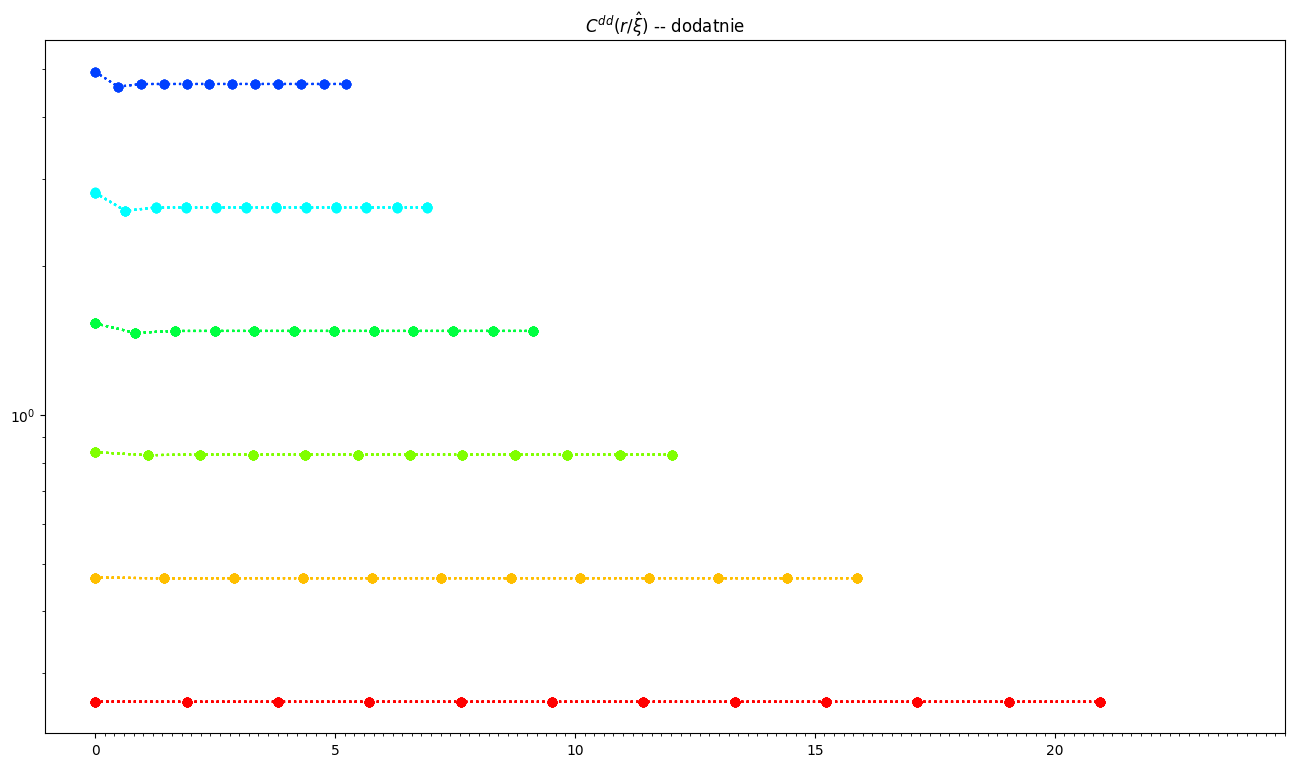

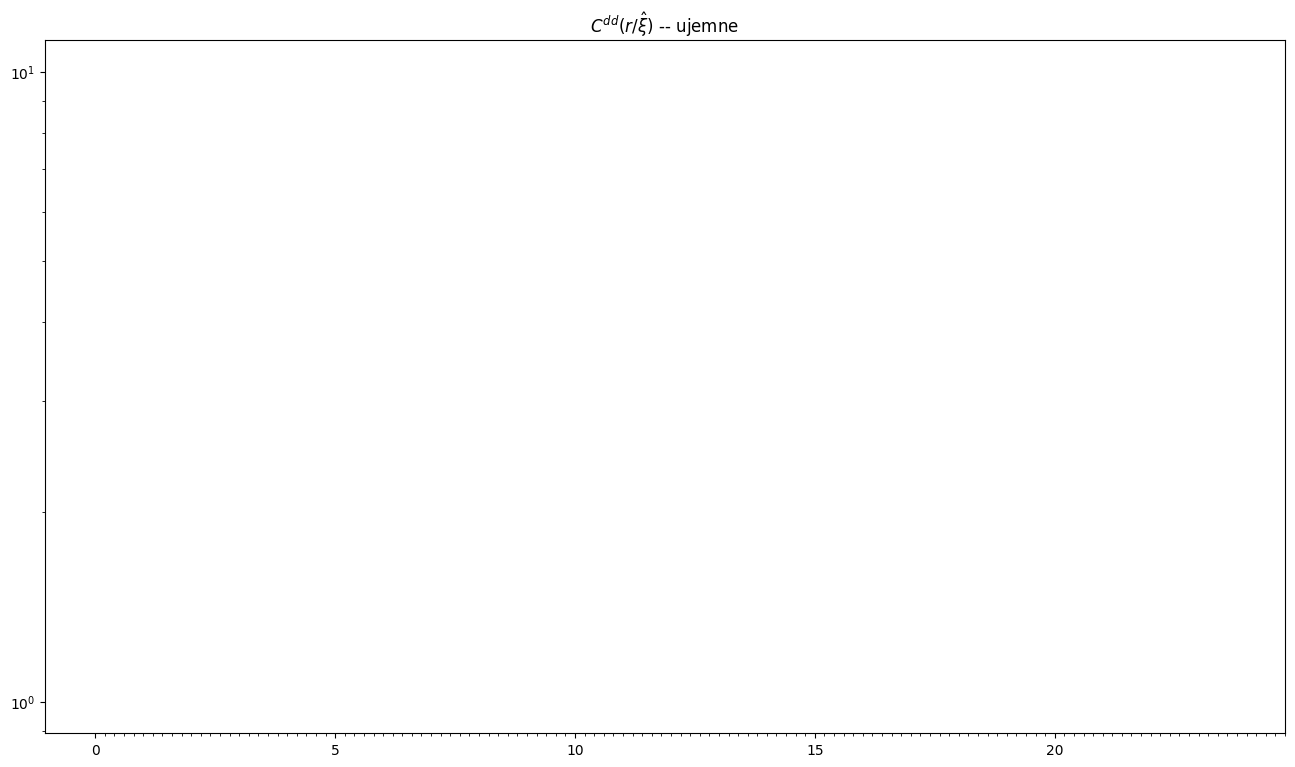

In [55]:
dataref = {}
form = []

fig,ax=plt.subplots()
fig2,ax2=plt.subplots()
n = 0
for i,data in enumerate(GrandData):
    xs = data['scaledX']
    ys = data['scaledY_NN']
    ax.errorbar(xs, ys, [0*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])
    ax2.errorbar(xs, -ys, [0*data['Delta']] * 12, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])
ax.set_yscale('log')
ax.set_xticks(np.arange(0,25,0.2), minor=True)
ax.set_title("$C^{dd}(r/\\hat\\xi)$ -- dodatnie")
ax2.set_title("$C^{dd}(r/\\hat\\xi)$ -- ujemne")
ax2.set_yscale('log')
ax2.set_xticks(np.arange(0,25,0.2), minor=True)
# ax.set_xlim((0.4,4.5))
# ax.legend()

In [35]:
dataref = {}
form = []

fig,ax=plt.subplots()
n = 0
for i,data in enumerate(GrandData):
    xs = data['scaledX']
    ys = data['scaledY']
    ax.errorbar(xs, ys, [8*data['Delta']] * 11, fmt = 'o', ls=':', label = str(data['k']) + "   " + str(data['D']) + "   " + str(data['chimult']), color=colors[data['k']])

ax.set_xticks(np.arange(0,25,0.2), minor=True)

# ax.set_xlim((0.4,4.5))
# ax.legend()

{'COR_AA': array([[[2.43042203e-01, 6.37253975e-02, 1.64537381e-02, 3.26450531e-03,
          4.95930915e-04, 7.35847117e-05, 1.44835847e-05, 3.69894410e-06,
          1.01390279e-06, 2.71982464e-07, 6.98920477e-08]]]),
 'notscaledX': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 'D': 10,
 'k': 60,
 'chimult': 3,
 'scaledY': array([5.25368916e-01, 1.37751150e-01, 3.55670021e-02, 7.05667409e-03,
        1.07202241e-03, 1.59063404e-04, 3.13082464e-05, 7.99577287e-06,
        2.19168936e-06, 5.87927243e-07, 1.51081207e-07]),
 'scaledX': array([0.47591348, 0.95182697, 1.42774045, 1.90365394, 2.37956742,
        2.85548091, 3.33139439, 3.80730788, 4.28322136, 4.75913485,
        5.23504833]),
 'Delta': 0.0005483072590012068}

In [18]:
f = open('buff.txt','r')
lines = f.readlines()
ns, ds, avns, anns, aaas = [], [], [], [], []
for line in lines:
    print(line[:-1].split("\t"))
    ns.append(float(line[:-1].split("\t")[0]))
    ds.append(float(line[:-1].split("\t")[1]))
    avns.append(float(line[:-1].split("\t")[2]))
    aaas.append(float(line[:-1].split("\t")[3]))
    anns.append(float(line[:-1].split("\t")[4]))
ns = np.array(ns)
ds = np.array(ds)
anns = np.array(anns)
avns = np.array(avns)
aaas = np.array(aaas)

['1', '1', '16.0015', '15.9998', '-7.9974', 'BH_short_MPS_0.001_0.36_1.0']
['1', '2', '31.9914', '63.983', '-15.996', 'BH_short_PEPS_0.001_0.01_1.0']
['2', '2', '95.8726', '191.7414', '-47.9096', 'BH2_short_PEPS_5_9_0.01_1.0_0.001_20']
['2', '2', '95.4806', '191.991', '-48.4671', 'BH2_short_PEPS_5_9_0.36_1.0_0.001_20']
['2', '1', '48.0028', '47.966', '-23.9066', 'BH2_short_MPS_5_9_0.01_1.0_0.001_20']
['2', '1', '47.9596', '47.999', '-24.1672', 'BH2_short_MPS_5_9_0.36_1.0_0.001_20']
['1', '2', '32.022', '63.9617', '-15.9416', './BH_d=5_sud_28_7_1.0_4.9_0.001_500']
['1', '2', '32.022', '63.9617', '-15.9416', './BH_d=5_sud_28_7_1.0_4.9_0.001_500']


In [19]:
print(np.round(-5 * anns / (ns*(ns+1) * 2**(1*ds+1))))
print(np.round( 5 * avns / (ns*(ns+1) * 2**(1*ds+2))))
print(np.round( 5 * aaas / (ns*(ns+1) * 2**(2*ds+1))))

[5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5.]
[5. 5. 5. 5. 5. 5. 5. 5.]


In [20]:
print(ds)
print(ns*(ns+1))

[1. 2. 2. 2. 1. 1. 2. 2.]
[2. 2. 6. 6. 6. 6. 2. 2.]


[ 16.  16.  64.  64. 192. 192.  48.  48.]


In [153]:
mess = """#!/bin/bash
#PBS -N sudden_5_D_chi
#PBS -l cput=5000:00:00
#PBS -q mp16
#PBS -o shiva_sudden_5_D_chi.out
#PBS -e shiva_sudden_5_D_chi.err
#PBS -M mazur.jakub05@gmail.com
#PBS -m abe
cd $HOME
eval "$(/usr/local/anaconda3/bin/conda shell.bash hook)"
nohup taskset -c 0-15 python -u createFullBH_PEPS.py chi D 1 5 0.01 100 < /dev/null > shortPEPS_D_chi.out & 2> shortPEPS_D_chi.err &

wait"""

In [154]:
drr = {}

for key in inds:
    drr[key] = [[],[],[],[],[],[]]

pref = 'L'

for ind in inds:
    with open(('L' if pref=='L' else '')+'ctmrg_timing_'+ind+'.out') as f:
        lines = f.readlines()
    for line in lines:
        if len(line) > 8:
            if line[0:6] == "Timing":
                # print(line[7:8],"\t",line[9:-3])
                drr[ind][int(line[7:8])-1].append(float(line[9:-3]))

    for i in range(0,6):
        drr[ind][i] = np.array(drr[ind][i])
    for i in range(0,6):
        drr[ind][i] = [np.mean(drr[ind][i]),np.std(drr[ind][i])]
    drr[ind] = np.array(drr[ind])
    # print(ind,np.array(drr[ind]))

data=[]
for ind in inds:
    data.append(drr[ind])
data=np.array(data)

Initialize 	 [ 4.23621184e-03  6.36274924e-06 -4.73128356e-07  1.35217051e-08]
Halves 	 [ 7.71856517e-02 -3.40139281e-02  1.32653999e-02  3.35562469e-05]
QR 	 [-3.58860637e-03  1.29937332e-03  2.06282652e-03  4.36587208e-05]
Isometries 	 [-0.61900319  0.35676739 -0.0486171   0.00275716]
New Corners and Edges 	 [ 1.69828874e-02 -7.76423160e-03  3.13665139e-03 -6.30610538e-06]
New Rhos 	 [ 2.15467634e-02 -6.26510222e-03  2.89311187e-03  1.24793653e-05]


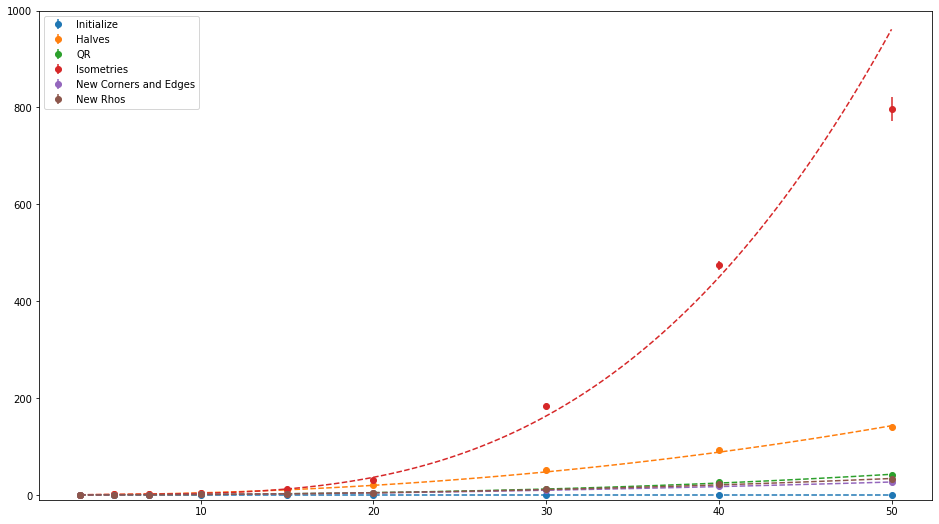

In [157]:
np.array(data).shape
labels = ['Initialize','Halves','QR','Isometries','New Corners and Edges','New Rhos']
colors = ['C'+str(i) for i in range(0,6)]
plt.clf()
#plt.yscale('log')
plt.ylim(-10,1000)

for i in range(6):
    popt,pcov=curve_fit(cubic,indsint,data[:,i,0],[1,1,1,1],sigma=data[:,i,1],absolute_sigma=True)
    print(labels[i],"\t",popt)
    if i==0: cpopt,cpcov = popt,pcov
    plt.errorbar(indsint,(4 if pref=='L' else 2)*data[:,i,0],data[:,i,1],fmt='o',label=labels[i],color=colors[i])
    plt.plot(np.linspace(indsint.min(),indsint.max(),100),(4 if pref=='L' else 2)*cubic(np.linspace(indsint.min(),indsint.max(),100),*popt),linestyle='dashed',color=colors[i])

plt.legend()
plt.savefig('Estimated_time_'+pref+'.png')
plt.show()

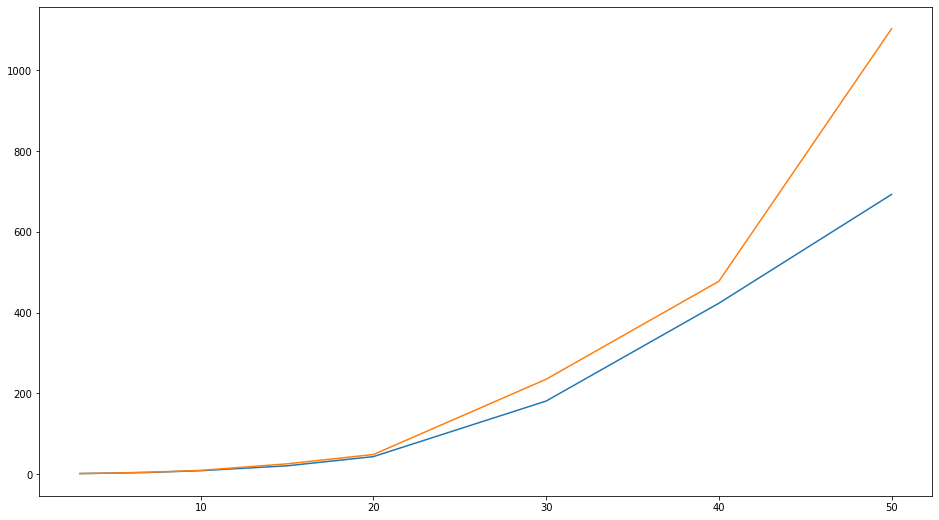

In [158]:
pref = 'L'
time={'L':[],'LR':[]}

for pref in ['L','LR']:
    for ind in inds:
        with open(('L' if pref=='L' else '')+'ctmrg_timing_'+ind+'.out') as f:
            lines = f.readlines()
        for line in lines:
            if len(line) > 8:
                if line[0:6] == "Whole ":
                    #print(int(ind),"\t",float(line[16:-3]))
                    time[pref].append(float(line[16:-3]))

plt.clf()
plt.plot(indsint,np.array(time['L'])/15)
plt.plot(indsint,np.array(time['LR'])/15)
plt.show()

In [146]:
import Tools
from scipy.linalg import svd, norm, qr
from scipy.sparse.linalg import svds
from time import time

def truncate_TEST(A, k=-1):
    if k==-1 or k>=np.min(A.shape): return svd(A, full_matrices=False)
    return svds(A, k, which='LM')

def truncate3(A, k=-1):
    u, s, vh = svd(A, full_matrices=False)
    if k <= 0 or k >= s.shape[0]:
        return u, s, vh
    else:
        s = s[:k]
        u = (u.T[:k]).T
        vh = (vh[:k])
        return u, s, vh

0
500
0
500
0
500
0
500
0
500
0
500
0
500
0
500
0
500


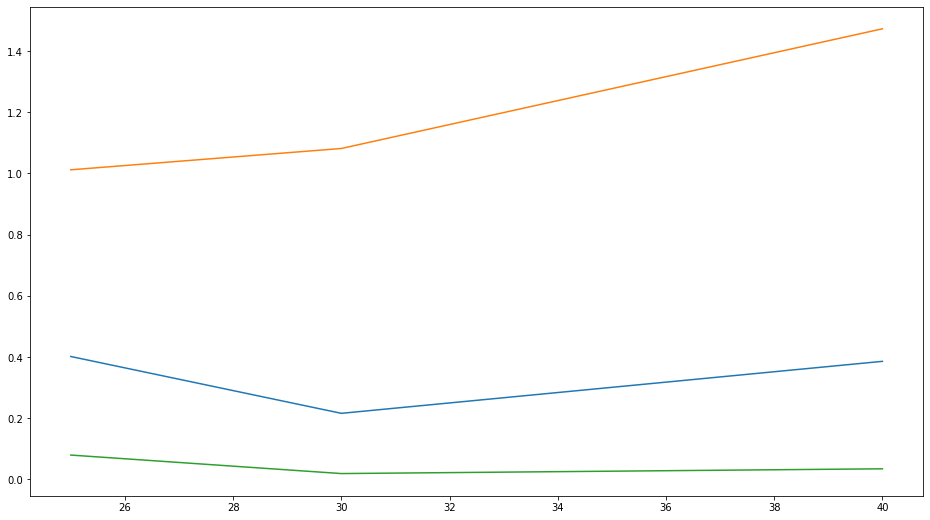

In [151]:
d1, d2 = 50, 30
delta=20
trandom, tnormal, tsparse = [], [], []
ds = [25,30,40]
iters = 1000

for d in ds:
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
    trandom.append(time()-t0)
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
        u,s,vh = truncate3(A,delta)
    tnormal.append(time()-t0)
    t0=time()
    for i in range(iters):
        if i%500==0:print(i)
        A=np.random.randn(d,d)
        u,s,vh = truncate_TEST(A,delta)
    tsparse.append(time()-t0)

plt.clf()
plt.plot(ds,tnormal)
plt.plot(ds,tsparse)
plt.plot(ds,trandom)
plt.show()

In [124]:
u,s,vh=truncate_TEST(A,20)

In [127]:
vh.shape

(20, 30)